<a href="https://colab.research.google.com/github/ESJoGithub/PythonStudy/blob/main/Keras_220920_MNIST_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **1. Library Import**

In [2]:
from keras import datasets, layers, models                
from tensorflow import keras                         # to_categorical 함수
from tensorflow.keras.models import load_model

import numpy as np
import matplotlib.pyplot as plt

In [3]:
(train_imgs, train_labels), (test_imgs, test_labels) = datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


### **2. 데이터 확인 및 전처리**

In [4]:
train_imgs.shape

(60000, 28, 28)

In [5]:
test_imgs.shape

(10000, 28, 28)

In [6]:
train_labels.shape

(60000,)

In [7]:
test_labels.shape

(10000,)

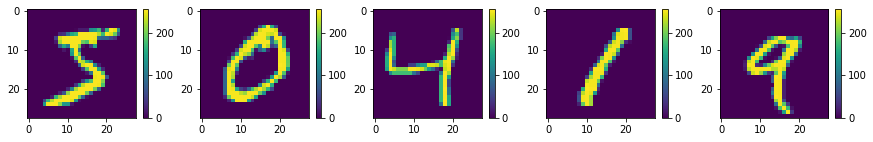

In [8]:
plt.figure(figsize=(15, 2))
for i in range(5):
  plt.subplot(1, 5, i+1)
  plt.imshow(train_imgs[i])
  plt.grid(False)
  plt.colorbar()
plt.show()

In [9]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [11]:
train_imgs = train_imgs/255.0
test_imgs = test_imgs/255.0

#### label을 one-hot encodig하여 처리

In [12]:
train_labels = keras.utils.to_categorical(train_labels, num_classes=10)
test_labels = keras.utils.to_categorical(test_labels, num_classes=10)

### **3. Baseline 모델**
---
#### __모델 설계__
이미지 크기가 크지 않고 자료의 형태가 상대적으로 단순하므로, sequencial함수를 활용하여 간단한 ANN모델로 만들어 보기로 함.

- input: 28 x 28인 6000개의 데이터(flatten + Dense해보기로 한다)
  > 28x28 = 784이므로 반영되지 않는 데이터 수를 줄이기 위해 첫번째 layer층의 노드 수를 128로 잡고 다음 layer층의 노드 수를 64로 하여 줄여나간다.

  > Desne layer에서 많은 사람들이 주로 사용하는 relu 함수를 적용해보도록 한다.

- output: 0~9 사이의 숫자로 분류(다중분류모델임을 감안하여 출력층에 softmax를 적용한다)

---

의문점

> 노드 수를 2의 제곱 수로 하는 이유가 있는가? (적용되는 activation fucntion들이 relu, sigmoid 등... 이진분류이기 때문인가?)

In [13]:
model = keras.Sequential([
  layers.Flatten(input_shape=(28, 28)),
  layers.Dense(128, activation='relu'),
  layers.Dense(64, activation='relu'),
  layers.Dense(10, activation='softmax')
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


####__손실함수 및 옵티마이저 설정__
---
optimizer는 경사하강법(SGD)를 활용하여 다른 optimizer들과 성능을 비교해보고자 함

다중 분류 모델의 손실함수로 많이 쓰이는 categorical_crossentropy를 활용

In [15]:
model.compile(optimizer='SGD', loss="categorical_crossentropy", metrics=['accuracy'])

#### __학습 및 결과분석__

In [19]:
model.fit(train_imgs, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 2ms/step - loss: 0.6305 - accuracy: 0.8353
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2940 - accuracy: 0.9170
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2427 - accuracy: 0.9304
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2092 - accuracy: 0.9407
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1836 - accuracy: 0.9475
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1632 - accuracy: 0.9531
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1466 - accuracy: 0.9573
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1331 - accuracy: 0.9618
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1214 - accuracy: 0.9656
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.111

epoch = 10일 때보다 더 발전 가능성이 있다고 보고 epoch 수를 늘려봄

In [20]:
model.fit(train_imgs, train_labels, epochs=30)

Epoch 1/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1031 - accuracy: 0.9709
Epoch 2/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0959 - accuracy: 0.9728
Epoch 3/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0895 - accuracy: 0.9743
Epoch 4/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0836 - accuracy: 0.9761
Epoch 5/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0784 - accuracy: 0.9776
Epoch 6/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0736 - accuracy: 0.9794
Epoch 7/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0693 - accuracy: 0.9805
Epoch 8/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0657 - accuracy: 0.9816
Epoch 9/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0623 - accuracy: 0.9823
Epoch 10/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.058

In [21]:
model.evaluate(test_imgs, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0772 - accuracy: 0.9769


[0.07724194973707199, 0.9768999814987183]